In [43]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [81]:
model = keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1", dtype=tf.string, input_shape=[], output_shape=[50]),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_16 (KerasLayer)  (None, 50)                48190600  
_________________________________________________________________
dense_32 (Dense)             (None, 128)               6528      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 129       
Total params: 48,197,257
Trainable params: 6,657
Non-trainable params: 48,190,600
_________________________________________________________________
None


In [82]:
BUFFER_SIZE = 1000
datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_batches = (datasets["train"].shuffle(BUFFER_SIZE).padded_batch(52))
test_batches = (datasets["test"].padded_batch(52))
history = model.fit(train_batches, epochs=10)

Epoch 1/10
481/481 [==============================] - 4s 8ms/step - loss: 0.5931 - accuracy: 0.6923
Epoch 2/10
481/481 [==============================] - 4s 8ms/step - loss: 0.5193 - accuracy: 0.7440
Epoch 3/10
481/481 [==============================] - 4s 8ms/step - loss: 0.5109 - accuracy: 0.7509
Epoch 4/10
481/481 [==============================] - 4s 8ms/step - loss: 0.5080 - accuracy: 0.7495
Epoch 5/10
481/481 [==============================] - 4s 8ms/step - loss: 0.5039 - accuracy: 0.7526
Epoch 6/10
481/481 [==============================] - 4s 8ms/step - loss: 0.5032 - accuracy: 0.7527
Epoch 7/10
481/481 [==============================] - 4s 8ms/step - loss: 0.5014 - accuracy: 0.7559
Epoch 8/10
481/481 [==============================] - 4s 8ms/step - loss: 0.4983 - accuracy: 0.7563
Epoch 9/10
481/481 [==============================] - 4s 8ms/step - loss: 0.4968 - accuracy: 0.7557
Epoch 10/10
481/481 [==============================] - 4s 8ms/step - loss: 0.4961 - accuracy: 0.7569

In [83]:
model.evaluate(test_batches)

481/481 [==============================] - 4s 7ms/step - loss: 0.5081 - accuracy: 0.7502


[0.5080713033676147, 0.7501999735832214]

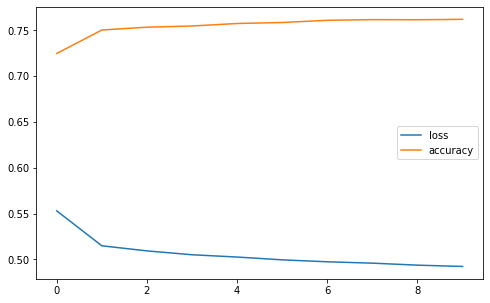

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))